# Análisis temporal de las instalaciones

## Se realiza una exploración de installs.csv en base a su evolución en el tiempo

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import itertools
import matplotlib.pyplot as plt

installs = pd.read_csv("/home/fedoremelianenko/FIUBA/Organizacion de datos/TP1/data/installs.csv",
                       usecols=['created','implicit','wifi'])
installs['created'] = pd.to_datetime(installs['created'])
installs['hour'] = installs['created'].apply(lambda x: x.hour)
installs['weekday'] = installs['created'].apply(lambda x: x.weekday_name)
installs.head()

/home/fedoremelianenko/.local/lib/python2.7/site-packages/ipykernel_launcher.py:11: FutureWarning: `weekday_name` is deprecated and will be removed in a future version. Use `day_name` instead
  # This is added back by InteractiveShellApp.init_path()


,created,implicit,wifi,hour,weekday
0,2019-03-13 01:43:33.445,False,NaN,1,Wednesday
1,2019-03-13 04:58:35.078,False,NaN,4,Wednesday
2,2019-03-13 04:20:57.666,True,NaN,4,Wednesday
3,2019-03-13 04:20:57.698,False,NaN,4,Wednesday
4,2019-03-10 22:24:56.684,True,NaN,22,Sunday


# 1. Análisis temporal de todas las instalaciones

## 1.1 Análisis por hora

### Se divide la data por hora en la que tomó lugar la instalación, a fin de identificar el período horario más activo

Text(0,0.5,'Instalaciones')

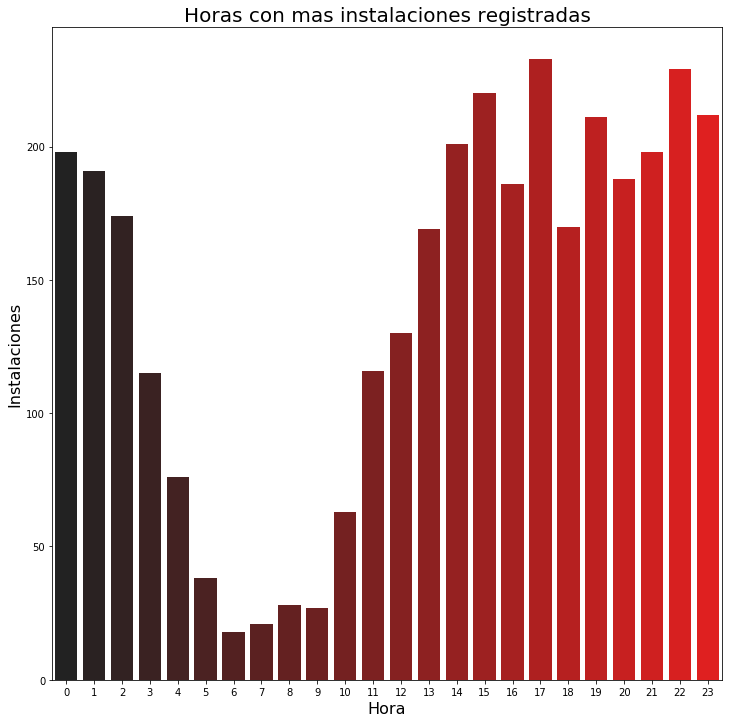

In [4]:
sequential_colors = itertools.cycle(sns.dark_palette("red", 24) )
plt.figure(figsize=(12, 12))
g = sns.countplot(data=installs, x='hour', palette = sequential_colors,
                  hue_order = installs['hour'].value_counts())
g.set_title('Horas con mas instalaciones registradas', fontsize=20)
g.set_xlabel('Hora',fontsize=16)
g.set_ylabel('Instalaciones',fontsize=16)

## 1.2 Análisis por día

### Ahora se puede llevar a cabo el mismo análisis pero con el objetivo de encontrar los días en los que más se instalaron aplicaciones

Text(0,0.5,'Instalaciones')

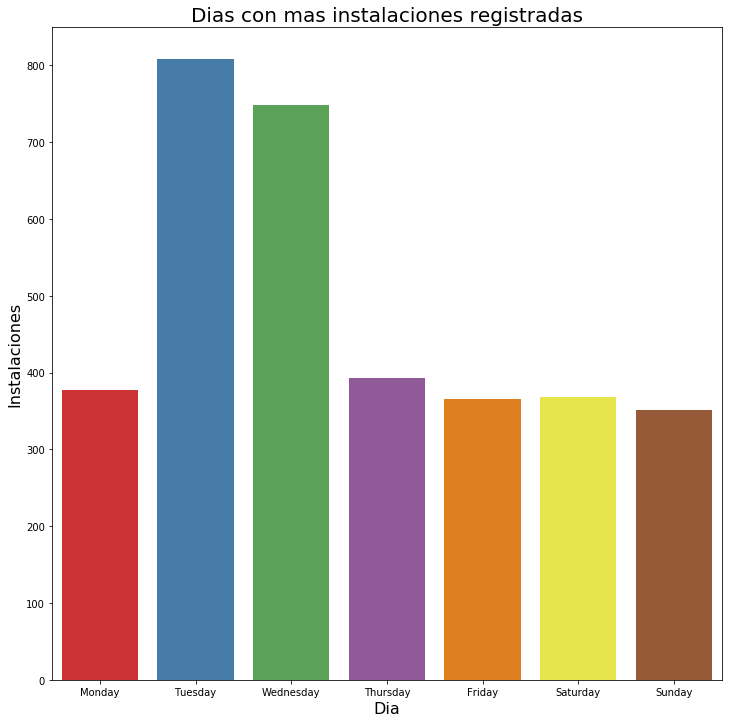

In [5]:
qualitative_colors = sns.color_palette("Set1", 7)
plt.figure(figsize=(12, 12))
g = sns.countplot(data=installs, x='weekday', palette = qualitative_colors,
                  hue_order = installs['weekday'].value_counts(),
                  order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
g.set_title('Dias con mas instalaciones registradas', fontsize=20)
g.set_xlabel('Dia',fontsize=16)
g.set_ylabel('Instalaciones',fontsize=16)

# 2. Análisis temporal dividido entre instalaciones implícitas y explícitas
## Se repite el análisis previo, pero ahora considerando si la instalación se realizó de forma directa o no

## 2.1 Análisis por día

In [6]:
g_plot = pd.crosstab(installs['weekday'],installs['implicit'])

Text(0,0.5,'Instalaciones')

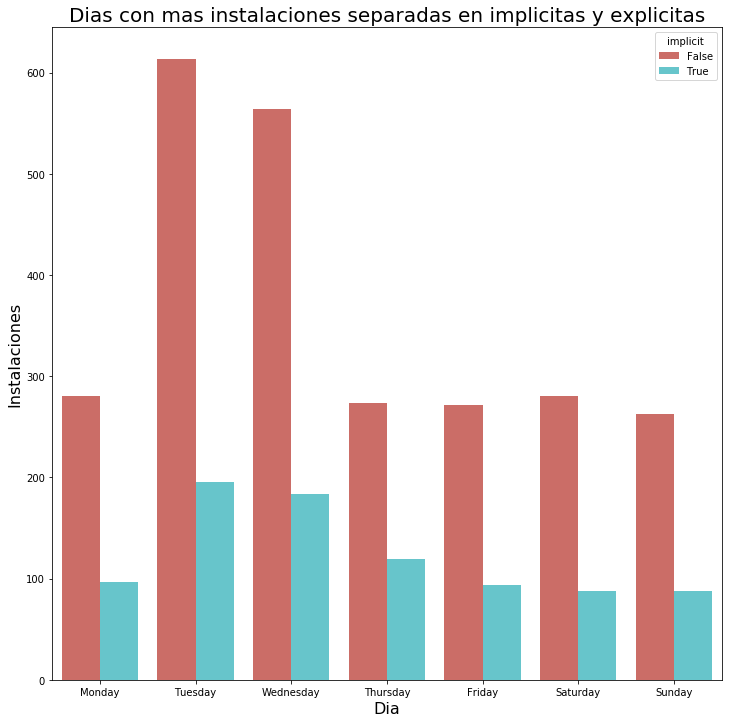

In [7]:
plt.figure(figsize=(12, 12))
g_bp = sns.countplot(x='weekday', hue='implicit', data=installs, palette='hls',
                    order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
g_bp.set_title('Dias con mas instalaciones separadas en implicitas y explicitas', fontsize = 20)
g_bp.set_xlabel('Dia', fontsize = 16)
g_bp.set_ylabel('Instalaciones', fontsize=16)

## 2.2 Análisis por hora

In [8]:
installs['suma'] = 1
installs_grouped = installs.groupby(['hour','implicit']).agg({'suma':'sum'})
installs_grouped = installs_grouped.reset_index()
installs_implicit = installs_grouped.loc[installs_grouped['implicit']==True]
installs_explicit = installs_grouped.loc[installs_grouped['implicit']==False]

In [9]:
installs_explicit.rename(columns={'suma':'Instalaciones explicitas'}, inplace=True)
installs_implicit.rename(columns={'suma':'Instalaciones implicitas'}, inplace=True)

installs_explicit = installs_explicit.set_index('hour')
installs_implicit = installs_implicit.set_index('hour')

/home/fedoremelianenko/.local/lib/python2.7/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


Text(0,0.5,'Cantidad de instalaciones')

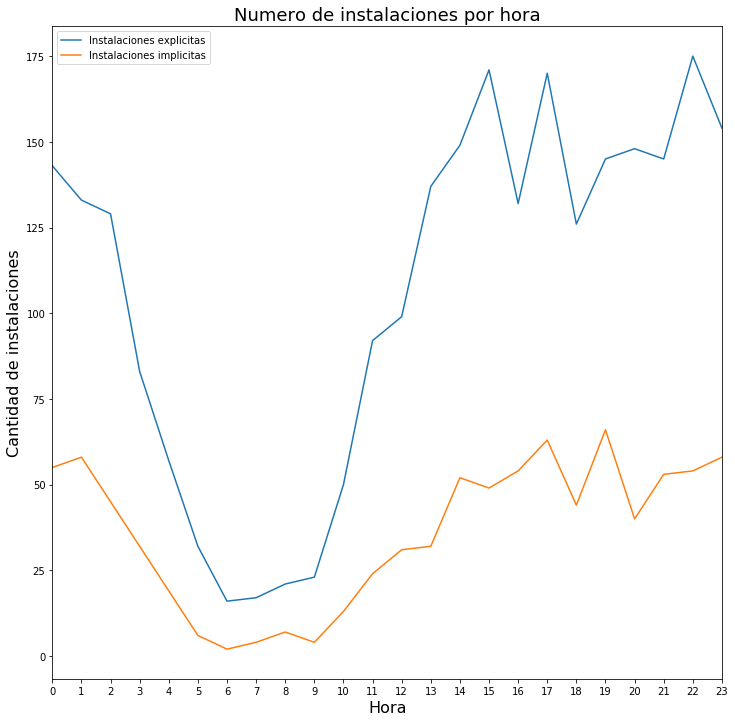

In [10]:
ax = installs_explicit.plot(xticks=np.arange(24), figsize=(12,12))
installs_implicit.plot(ax=ax)
ax.set_title('Numero de instalaciones por hora', fontsize=18)
ax.set_xlabel('Hora',fontsize=16)
ax.set_ylabel('Cantidad de instalaciones',fontsize=16)

# 3. Análisis temporal dividido entre instalaciones realizadas con wi-fi y sin

## 2.1 Análisis por día

In [11]:
installs.dropna(inplace=True,subset = ['wifi'])
g_plot = pd.crosstab(installs['weekday'],installs['wifi'])

Text(0,0.5,'Instalaciones')

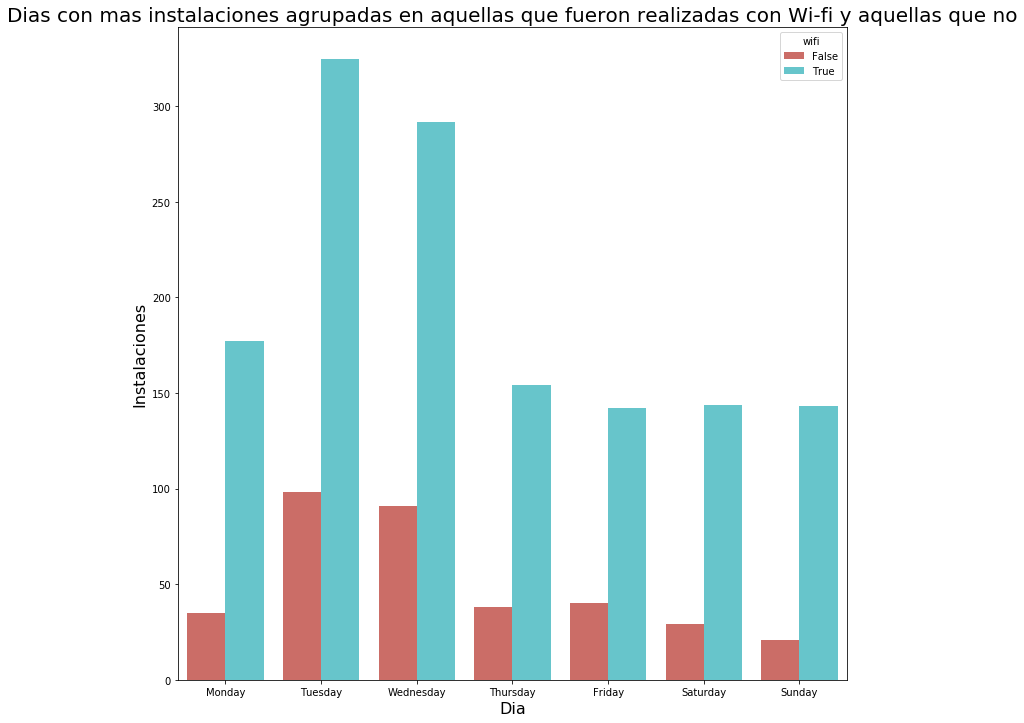

In [12]:
plt.figure(figsize=(12, 12))
g_bp = sns.countplot(x='weekday', hue='wifi', data=installs, palette='hls',
                    order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
g_bp.set_title('Dias con mas instalaciones agrupadas en aquellas que fueron realizadas con Wi-fi y aquellas que no', fontsize = 20)
g_bp.set_xlabel('Dia', fontsize = 16)
g_bp.set_ylabel('Instalaciones', fontsize=16)

## 3.2 Analisis por hora

In [13]:
installs['suma'] = 1
installs_grouped = installs.groupby(['hour','wifi']).agg({'suma':'sum'})
installs_grouped = installs_grouped.reset_index()
installs_wifi = installs_grouped.loc[installs_grouped['wifi']==True]
installs_datos = installs_grouped.loc[installs_grouped['wifi']==False]

In [14]:
installs_wifi.rename(columns={'suma':'Instalaciones realizadas con Wifi'}, inplace=True)
installs_datos.rename(columns={'suma':'Instalaciones realizadas con datos móviles'}, inplace=True)

installs_wifi = installs_wifi.set_index('hour')
installs_datos = installs_datos.set_index('hour')

Text(0,0.5,'Cantidad de instalaciones')

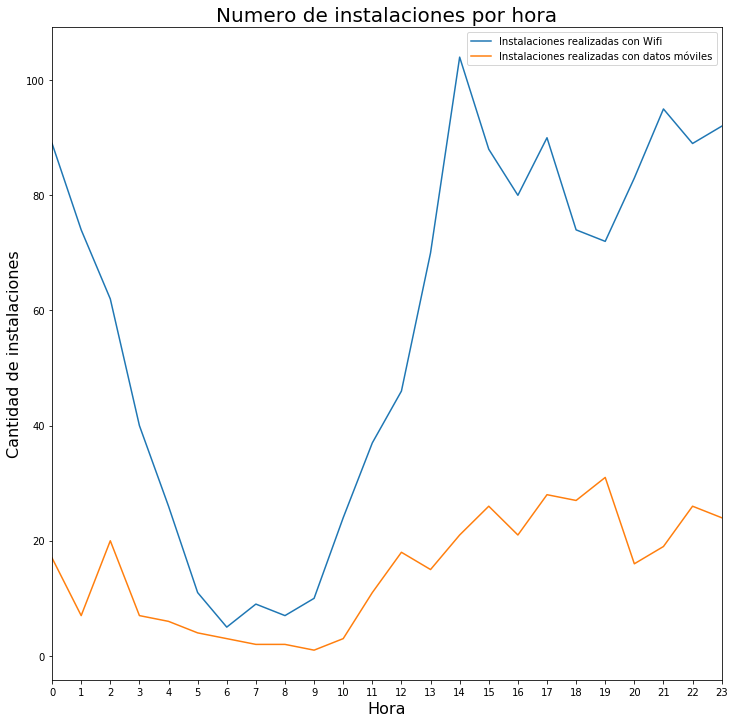

In [15]:
ax = installs_wifi.plot(xticks=np.arange(24), figsize=(12,12))
installs_datos.plot(ax=ax)
ax.set_title('Numero de instalaciones por hora', fontsize=20)
ax.set_xlabel('Hora',fontsize=16)
ax.set_ylabel('Cantidad de instalaciones',fontsize=16)